Epoch 1, Loss: 0.11173694580793381
Epoch 101, Loss: 9.243666454494814e-08
Epoch 201, Loss: 9.243666454494814e-08
Epoch 301, Loss: 9.243666454494814e-08
Epoch 401, Loss: 9.243666454494814e-08


train loss: 1.94e-04 | test loss: 1.94e-04 | reg: 0.00e+00 : 100%|█| 500/500 [00:17<00:00, 27.99it/s


Loss: 3.755465272092806e-08


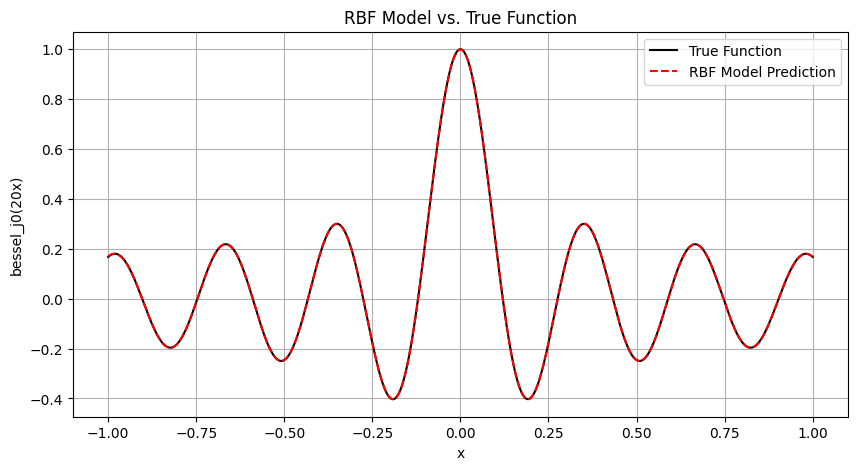

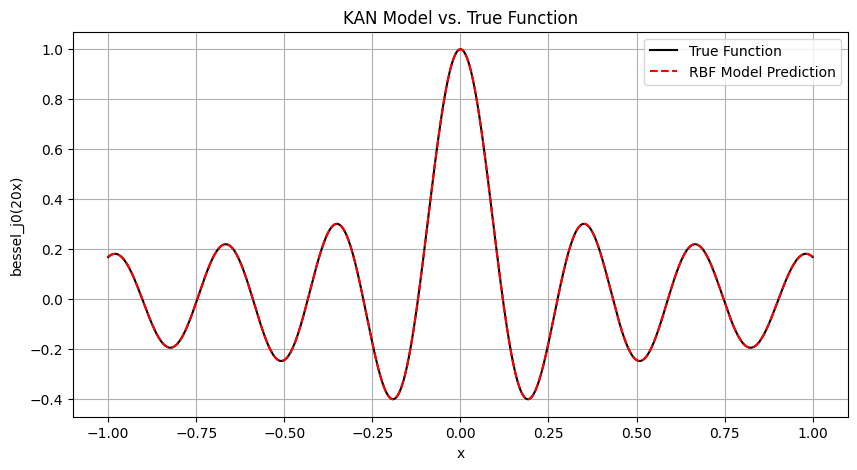

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from better_kan import KAN
class RBF(nn.Module):
    def __init__(self, in_features, num_centers, sigma):
        super(RBF, self).__init__()
        self.in_features = in_features
        self.num_centers = num_centers
        self.sigma = sigma
        self.centers = nn.Parameter(torch.Tensor(num_centers, in_features))
        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.uniform_(self.centers, -1, 1)  # Assuming input range [-1,1]

    def forward(self, inputs):
        size = (inputs.size(0), self.num_centers, self.in_features)
        x_expanded = inputs.unsqueeze(1).expand(size)
        centers_expanded = self.centers.unsqueeze(0).expand(size)
        return torch.exp(-torch.norm(x_expanded - centers_expanded, dim=2) ** 2 / (2 * self.sigma ** 2))

class RBFNetwork(nn.Module):
    def __init__(self, in_features, num_centers, out_features, sigma):
        super(RBFNetwork, self).__init__()
        self.rbf = RBF(in_features, num_centers, sigma)
        self.linear = nn.Linear(num_centers, out_features)

    def forward(self, x):
        out = self.rbf(x)
        rbf=out.unsqueeze(1)*self.linear.weight.unsqueeze(0)
        rbf=rbf.squeeze(1)
        out = self.linear(out)
        return out,rbf

# Model and optimizer setup
num_centers = 50
sigma = 0.1
model = RBFNetwork(in_features=1, num_centers=num_centers, out_features=1, sigma=sigma)
optimizer = optim.LBFGS(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Data Generation for Bessel function J0(20x)
x = torch.linspace(-1, 1, steps=1000).unsqueeze(1)
y = torch.special.bessel_j0(20 * x)

# Training loop without batching
def train(model, optimizer, loss_fn, epochs, x, y):
    model.train()
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            output = model(x)[0]
            loss = loss_fn(output, y)
            loss.backward()
            return loss
        loss=optimizer.step(closure)
        if epoch % 100 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train(model, optimizer, loss_fn, epochs=500, x=x, y=y)

# Plotting the results
plt.figure(figsize=(10, 5))
predicted = model(x)[0].detach()
plt.plot(x.numpy(), y.numpy(), label='True Function',color="black")
plt.plot(x.numpy(), predicted.numpy(), label='RBF Model Prediction', linestyle='--',color="red")
plt.legend()
plt.title('RBF Model vs. True Function')
plt.xlabel('x')
plt.ylabel('bessel_j0(20x)')
plt.grid(True)

model=KAN([1,1],100)
dataset={}
dataset["train_input"]=x
dataset["train_label"]=y
dataset["test_input"]=x
dataset["test_label"]=y
model.train(dataset,steps=500,lr=0.1)
predicted = model(x).detach()
print(f'Loss: {loss_fn(predicted, y).item()}')


# Plotting the results
plt.figure(figsize=(10, 5))
predicted = model(x).detach()
plt.plot(x.numpy(), y.numpy(), label='True Function',color="black")
plt.plot(x.numpy(), predicted.numpy(), label='RBF Model Prediction', linestyle='--',color="red")
plt.legend()
plt.title('KAN Model vs. True Function')
plt.xlabel('x')
plt.ylabel('bessel_j0(20x)')
plt.grid(True)
plt.show()

Epoch 1, Loss: 0.08019010722637177
Epoch 101, Loss: 0.004808151628822088
Epoch 201, Loss: 0.004800618626177311
Epoch 301, Loss: 0.004800618626177311
Epoch 401, Loss: 0.004800618626177311


train loss: 1.48e-04 | test loss: 1.48e-04 | reg: 0.00e+00 : 100%|█| 500/500 [00:36<00:00, 13.85it/s


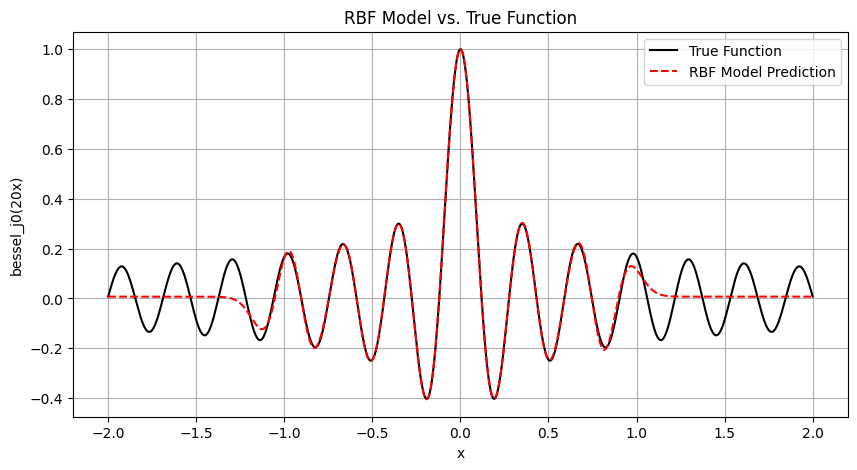

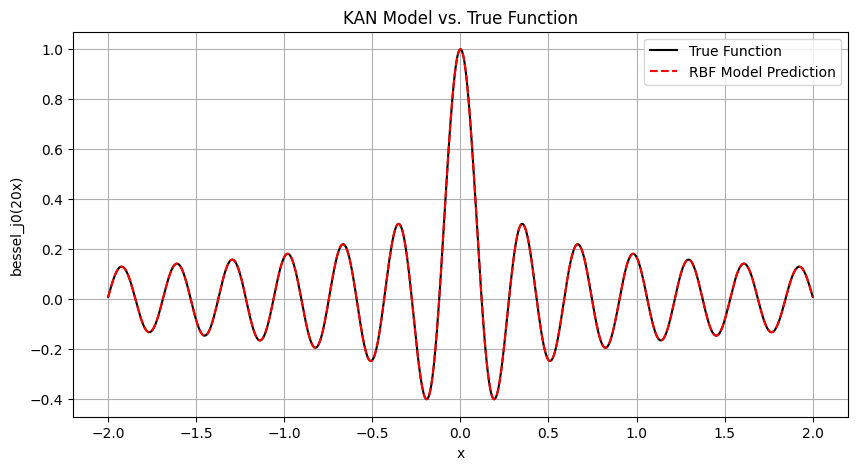

In [2]:

# Model and optimizer setup
num_centers = 100
sigma = 0.1
model = RBFNetwork(in_features=1, num_centers=num_centers, out_features=1, sigma=sigma)
optimizer = optim.LBFGS(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Data Generation for Bessel function J0(20x)
x = torch.linspace(-2, 2, steps=1000).unsqueeze(1)
y = torch.special.bessel_j0(20 * x)

# Training loop without batching
def train(model, optimizer, loss_fn, epochs, x, y):
    model.train()
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            output = model(x)[0]
            loss = loss_fn(output, y)
            loss.backward()
            return loss
        loss=optimizer.step(closure)
        if epoch % 100 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train(model, optimizer, loss_fn, epochs=500, x=x, y=y)

# Plotting the results
plt.figure(figsize=(10, 5))
predicted = model(x)[0].detach()
plt.plot(x.numpy(), y.numpy(), label='True Function',color="#1f77b4")
plt.plot(x.numpy(), predicted.numpy(), label='RBF Model Prediction', linestyle='--',color="red")
plt.legend()
plt.title('RBF Model vs. True Function')
plt.xlabel('x')
plt.ylabel('bessel_j0(20x)')
plt.grid(True)

model=KAN([1,1],100)
dataset={}
dataset["train_input"]=x
dataset["train_label"]=y
dataset["test_input"]=x
dataset["test_label"]=y
model.train(dataset,steps=500,lr=0.1)



# Plotting the results
plt.figure(figsize=(10, 5))
predicted = model(x).detach()
plt.plot(x.numpy(), y.numpy(), label='True Function',color="#1f77b4")
plt.plot(x.numpy(), predicted.numpy(), label='RBF Model Prediction', linestyle='--',color="red")
plt.legend()
plt.title('KAN Model vs. True Function')
plt.xlabel('x')
plt.ylabel('bessel_j0(20x)')
plt.grid(True)
plt.show()

Epoch 1, Loss: 0.5410719513893127
Epoch 101, Loss: 7.600470416946337e-05
Epoch 201, Loss: 7.600470416946337e-05
Epoch 301, Loss: 7.600470416946337e-05
Epoch 401, Loss: 7.600470416946337e-05


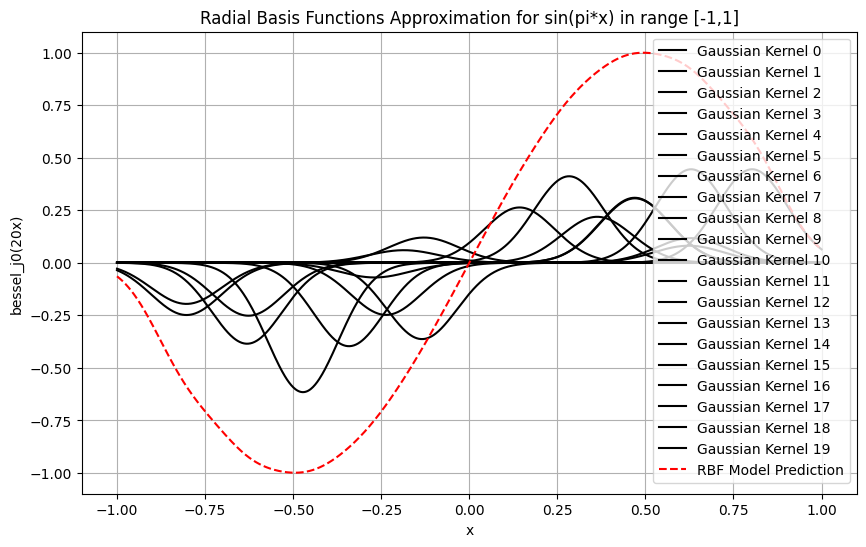

In [2]:

# Model and optimizer setup
num_centers = 20
sigma = 0.1
model = RBFNetwork(in_features=1, num_centers=num_centers, out_features=1, sigma=sigma)
optimizer = optim.LBFGS(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Data Generation for Bessel function J0(20x)
x = torch.linspace(-1, 1, steps=1000).unsqueeze(1)
y = torch.sin(torch.pi* x)

# Training loop without batching
def train(model, optimizer, loss_fn, epochs, x, y):
    model.train()
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            output = model(x)[0]
            loss = loss_fn(output, y)
            loss.backward()
            return loss
        loss=optimizer.step(closure)
        if epoch % 100 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train(model, optimizer, loss_fn, epochs=500, x=x, y=y)

# Plotting the results
plt.figure(figsize=(10, 6))
predicted,rbf = model(x)
predicted,rbf=predicted.detach(),rbf.detach()
for i in range( rbf.size(1)):
    plt.plot(x.numpy(), rbf[:,i].numpy(), label=f'Gaussian Kernel {i}',color='black')

plt.plot(x.numpy(), predicted.numpy(), label='RBF Model Prediction', linestyle='--',color='red')
# plt.plot(x.numpy(), y.numpy(), label='True Function',color='blue')
plt.legend()
plt.title('Radial Basis Functions Approximation for sin(pi*x) in range [-1,1]')
plt.xlabel('x')
plt.ylabel('bessel_j0(20x)')
plt.grid(True)


plt.grid(True)
plt.show()

Epoch 1, Loss: 0.5715583562850952
Epoch 101, Loss: 4.814779117623402e-07
Epoch 201, Loss: 4.814779117623402e-07
Epoch 301, Loss: 4.814779117623402e-07
Epoch 401, Loss: 4.814779117623402e-07


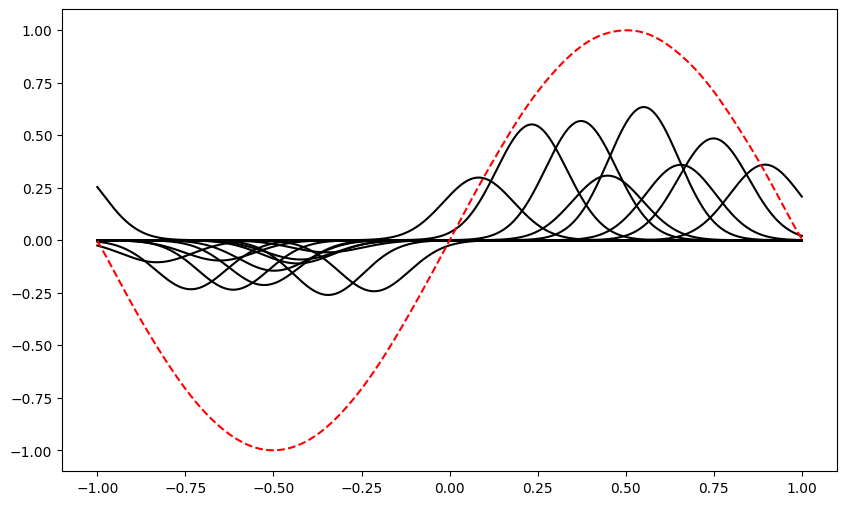

In [3]:

# Model and optimizer setup
num_centers = 20
sigma = 0.1
model = RBFNetwork(in_features=1, num_centers=num_centers, out_features=1, sigma=sigma)
optimizer = optim.LBFGS(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Data Generation for Bessel function J0(20x)
x = torch.linspace(-1, 1, steps=1000).unsqueeze(1)
y = torch.sin(torch.pi* x)

# Training loop without batching
def train(model, optimizer, loss_fn, epochs, x, y):
    model.train()
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            output = model(x)[0]
            loss = loss_fn(output, y)
            loss.backward()
            return loss
        loss=optimizer.step(closure)
        if epoch % 100 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train(model, optimizer, loss_fn, epochs=500, x=x, y=y)

# Plotting the results
plt.figure(figsize=(10, 6))
predicted,rbf = model(x)
predicted,rbf=predicted.detach(),rbf.detach()
for i in range( rbf.size(1)):
    plt.plot(x.numpy(), rbf[:,i].numpy(), label=f'Gaussian Kernel {i}',color='black')

plt.plot(x.numpy(), predicted.numpy(), label='RBF Model Prediction', linestyle='--',color='red')

plt.show()

Epoch 1, Loss: 0.4981142580509186
Epoch 101, Loss: 0.2500717043876648
Epoch 201, Loss: 0.25007161498069763
Epoch 301, Loss: 0.25007161498069763
Epoch 401, Loss: 0.25007161498069763


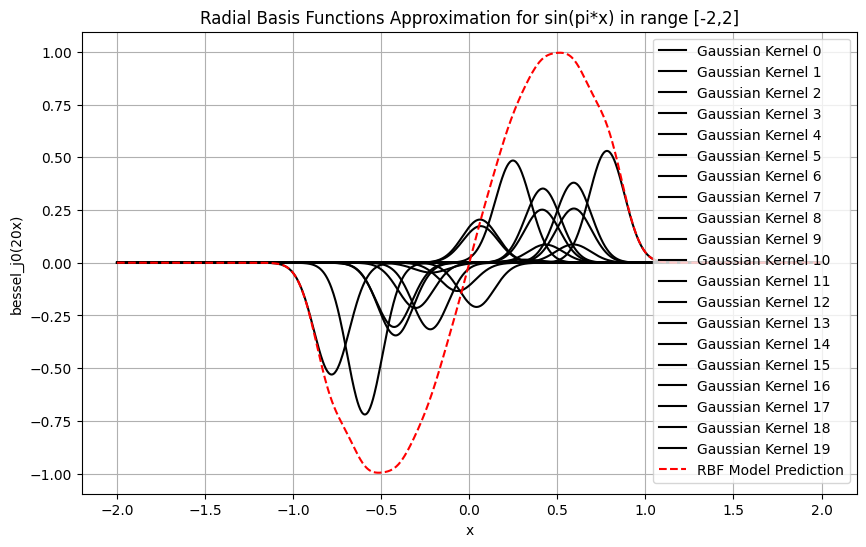

In [19]:

# Model and optimizer setup
torch.random.manual_seed(1)
num_centers = 20
sigma = 0.1
model = RBFNetwork(in_features=1, num_centers=num_centers, out_features=1, sigma=sigma)
optimizer = optim.LBFGS(model.parameters(), lr=0.1)
loss_fn = nn.MSELoss()

# Data Generation for Bessel function J0(20x)
x = torch.linspace(-2, 2, steps=1000).unsqueeze(1)
y = torch.sin(torch.pi* x)

# Training loop without batching
def train(model, optimizer, loss_fn, epochs, x, y):
    model.train()
    for epoch in range(epochs):
        def closure():
            optimizer.zero_grad()
            output = model(x)[0]
            loss = loss_fn(output, y)
            loss.backward()
            return loss
        loss=optimizer.step(closure)
        if epoch % 100 == 0:
            print(f'Epoch {epoch+1}, Loss: {loss.item()}')

train(model, optimizer, loss_fn, epochs=500, x=x, y=y)

# Plotting the results
plt.figure(figsize=(10, 6))
predicted,rbf = model(x)
predicted,rbf=predicted.detach(),rbf.detach()
for i in range( rbf.size(1)):
    plt.plot(x.numpy(), rbf[:,i].numpy(), label=f'Gaussian Kernel {i}',color='black')

plt.plot(x.numpy(), predicted.numpy(), label='RBF Model Prediction', linestyle='--',color='red')
# plt.plot(x.numpy(), y.numpy(), label='True Function',color='blue')
plt.legend()
plt.title('Radial Basis Functions Approximation for sin(pi*x) in range [-2,2]')
plt.xlabel('x')
plt.ylabel('bessel_j0(20x)')
plt.grid(True)


plt.grid(True)
plt.show()